In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import scale

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [66]:
df = pd.read_csv('social.csv')

In [67]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
X_train = scale(X_train)
X_test = scale(X_test)

## bagging
1. bagged decision trees

In [70]:
score = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
score.mean()

np.float64(0.8125)

In [71]:
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=42
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.88125

In [72]:
score = cross_val_score(bag_model, X, y, cv=5)
score.mean()

np.float64(0.85)

In [73]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bag_model.predict(X_train)),
        'Test': accuracy_score(y_test, bag_model.predict(X_test)),
    },
}

2. random forest

In [74]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
scores['Random Forest'] = {
    'Train': accuracy_score(y_train, rfc.predict(X_train)),
    'Test': accuracy_score(y_test, rfc.predict(X_test)),
}

3. extra trees

In [76]:
extra = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [77]:
scores['Extra Tree'] = {
    'Train': accuracy_score(y_train, extra.predict(X_train)),
    'Test': accuracy_score(y_test, extra.predict(X_test)),
}

## boosting
1. adaboost

In [78]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [79]:
scores['AdaBoost'] = {
    'Train': accuracy_score(y_train, ada.predict(X_train)),
    'Test': accuracy_score(y_test, ada.predict(X_test)),
}

2. gradient boosting

In [80]:
gradient_boost = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boost.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [81]:
scores['Gradient Boosting'] = {
    'Train': accuracy_score(y_train, gradient_boost.predict(X_train)),
    'Test': accuracy_score(y_test, gradient_boost.predict(X_test)),
}

## voting

In [82]:
estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic',
                              LogisticRegression(solver='liblinear')),
                             ('Tree', DecisionTreeClassifier()),
                             ('SVM', SVC())])

In [83]:
scores['Voting'] = {
    'Train': accuracy_score(y_train, voting.predict(X_train)),
    'Test': accuracy_score(y_test, voting.predict(X_test)),
}

scores

In [84]:
scores

{'Bagging Classifier': {'Train': 0.99375, 'Test': 0.875},
 'Random Forest': {'Train': 0.996875, 'Test': 0.8625},
 'Extra Tree': {'Train': 0.996875, 'Test': 0.8875},
 'AdaBoost': {'Train': 0.9125, 'Test': 0.875},
 'Gradient Boosting': {'Train': 0.9625, 'Test': 0.85},
 'Voting': {'Train': 0.925, 'Test': 0.9}}

<Axes: >

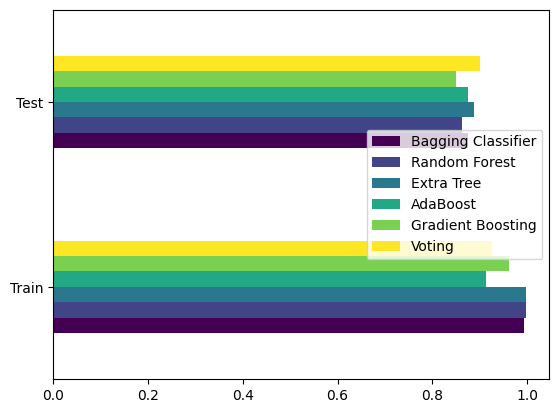

In [85]:
scores = pd.DataFrame(scores)
scores.plot(kind='barh', colormap='viridis')